In [1]:
from subpred.protein_go_datasets import get_transmembrane_transporter_dataset, get_stats

## Parameters

In [ ]:
ORGANISMS = [3702]  # athaliana 3702 yeast 559292 human 9606 ecoli 83333
GO_TERMS_CLASSES = [
    "sugar transmembrane transporter activity",
    "amino acid transmembrane transporter activity",
]
IDENTITY_THRESHOLD = 70
TEST_NAME = "svc_at_sugaramino"
# TODO pathlib
FEATURES_FOLDER = "../data/tmp_data/"  # to share between environments
RESULTS_FOLDER = "../data/results/"
RECALCULATE_RESULTS = False  # If false, use cached results, e.g. to create more plots

## Full dataset

In [3]:
# Get full dataset for stats. Dataset for analysis is created in cell below.
dataset_unfiltered = get_transmembrane_transporter_dataset(
    organism_ids=ORGANISMS,
    swissprot_only=False,
    datasets_path="../data/datasets/",
    exclude_iea_go_terms=False,
    max_sequence_evidence_code=2,
    remove_proteins_without_gene_names=False,
)
get_stats(*dataset_unfiltered)

cd-hit: clustered 1773 sequences into 646 clusters at threshold 50
cd-hit: clustered 1773 sequences into 923 clusters at threshold 70
cd-hit: clustered 1773 sequences into 1203 clusters at threshold 90
cd-hit: clustered 1773 sequences into 1554 clusters at threshold 100


n_transporters  \
swissprot_reviewed has_gene_name go_evidence   protein_existence_evidence clustering                   
False              False         computational protein_level              100                      3   
                                                                          None                     3   
                                               transcript_level           50                       3   
                                                                          70                       4   
                                                                          90                       7   
                                                                          100                     37   
                                                                          None                    49   
                   True          computational protein_level              50                      87   
                                                                          70                     114   
                                                                          90                     153   
                                                                          100                    329   
                                                                          None                   433   
                                               transcript_level           50                       7   
                                                                          70                      13   
                                                                          90                      19   
                                                                          100                     84   
                                                                          None                   164   
                                 experiment    protein_level              50                      25   
                                                                          70                      33   
                                                                          90                      38   
                                                                          100                     41   
                                                                          None                    42   
                                               transcript_level           50                       3   
                                                                          70                       5   
                                                                          90                       5   
                                                                          100                      6   
                                                                          None                     6   
True               True          computational protein_level              50                     206   
                                                                          70                     287   
                                                                          90                     370   
                                                                          100                    408   
                                                                          None                   418   
                                               transcript_level           50                     208   
                                                                          70                     338   
                                                                          90                     462   
                                                                          100                    492   
                                                                          None                   504   
                              

## Filtered Subset

In [4]:
dataset_organism = get_transmembrane_transporter_dataset(  # organism
    organism_ids=ORGANISMS,
    swissprot_only=True,
    datasets_path="../data/datasets/",
    exclude_iea_go_terms=True,
    max_sequence_evidence_code=1,
    remove_proteins_without_gene_names=True,
)
get_stats(*dataset_organism)

cd-hit: clustered 420 sequences into 276 clusters at threshold 50
cd-hit: clustered 420 sequences into 344 clusters at threshold 70
cd-hit: clustered 420 sequences into 403 clusters at threshold 90
cd-hit: clustered 420 sequences into 419 clusters at threshold 100


n_transporters  \
swissprot_reviewed has_gene_name go_evidence protein_existence_evidence clustering                   
True               True          experiment  protein_level              50                     276   
                                                                        70                     344   
                                                                        90                     403   
                                                                        100                    419   
                                                                        None                   420   

                                                                                    n_terms  
swissprot_reviewed has_gene_name go_evidence protein_existence_evidence clustering           
True               True          experiment  protein_level              50              264  
                                                                        70              281  
                                                                        90              288  
                                                                        100             288  
                                                                        None            288

## Sugar/Amino subset

In [5]:
from subpred.dataset_filters import get_classification_subset

dataset_organism = get_classification_subset(
    dataset_full=dataset_organism, go_terms=GO_TERMS_CLASSES
)

print("before clustering:")
dataset_organism[1].go_term_ancestor.value_counts()

before clustering:


go_term_ancestor
amino acid transmembrane transporter activity    33
sugar transmembrane transporter activity         32
Name: count, dtype: int64

In [6]:
from subpred.dataset_filters import filter_no_3Di_available

dataset_organism = filter_no_3Di_available(dataset_organism)
dataset_organism[1].go_term_ancestor.value_counts()

go_term_ancestor
amino acid transmembrane transporter activity    33
sugar transmembrane transporter activity         32
Name: count, dtype: int64

Clustering at 70%

In [7]:
from subpred.dataset_filters import cluster_sequences

dataset_organism = cluster_sequences(
    dataset_full=dataset_organism, identity_threshold=IDENTITY_THRESHOLD
)
dataset_organism[1].go_term_ancestor.value_counts()

cd-hit: clustered 65 sequences into 54 clusters at threshold 70


go_term_ancestor
sugar transmembrane transporter activity         28
amino acid transmembrane transporter activity    26
Name: count, dtype: int64

## Feature generation

In [8]:
from subpred.features import get_features

features_list, series_labels = get_features(dataset_full=dataset_organism)

2025-05-31 22:20:33.529340: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-31 22:20:33.592979: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748722833.604166  178092 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748722833.608425  178092 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-31 22:20:33.676455: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

For each Feature: Outlier detection, numpy conversion 

In [9]:
from subpred.features import get_ml_datasets

ml_datasets = list(
    get_ml_datasets(features_list=features_list, series_labels=series_labels)
)
ml_datasets

[Name: DUMMY, Features: 1024, Samples: 54, Classes: [0 1], Labels: ['amino acid transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: AAC, Features: 20, Samples: 54, Classes: [0 1], Labels: ['amino acid transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: PAAC, Features: 400, Samples: 54, Classes: [0 1], Labels: ['amino acid transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: AA_KMER3, Features: 8000, Samples: 54, Classes: [0 1], Labels: ['amino acid transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: 3Di_COMP, Features: 20, Samples: 54, Classes: [0 1], Labels: ['amino acid transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: 3Di_KMER2, Features: 400, Samples: 54, Classes: [0 1], Labels: ['amino acid transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: 3Di_KMER

In [10]:
# saving as pickle, to load in different notebook with different env,
# as tensorflow on GPU has problems with current CUDA version (too new)
import pickle

with open(f"{FEATURES_FOLDER}{TEST_NAME}_ml_data.pickle", "wb") as handle:
    pickle.dump(ml_datasets, handle)

## Outliers

In [11]:
from subpred.evaluation import outlier_check

outlier_check(dataset_full=dataset_organism, ml_datasets=ml_datasets, threshold=0.8)

,outlier_count,protein_names,go_term_ancestor
Uniprot,,,


## Model evaluation SVM

In [12]:
ml_datasets[0]

Name: DUMMY, Features: 1024, Samples: 54, Classes: [0 1], Labels: ['amino acid transmembrane transporter activity'
 'sugar transmembrane transporter activity'])

In [13]:
from subpred.evaluation import (
    get_svm_results,
    plot_results_long,
    summarize_results_long,
)
from sklearn.metrics import f1_score, make_scorer

scoring_outer = {
    "Balanced Accuracy": "balanced_accuracy",
    "F1 Macro": "f1_macro",
    "F1 Amino Acid": make_scorer(
        f1_score, pos_label=0
    ),  # labels are encoded in lex. order
    "F1 Sugar": make_scorer(f1_score, pos_label=1),
}

df_results_long = get_svm_results(
    ml_datasets=ml_datasets,
    recalculate=RECALCULATE_RESULTS,
    output_folder=RESULTS_FOLDER,
    test_name=TEST_NAME,
    inner_cv=5,
    outer_cv=5,
    repeats=10,
    n_jobs_inner=1,
    n_jobs_outer=-1,
    scoring_inner="balanced_accuracy",
    scoring_outer=scoring_outer,
)
# df_results_long

=== DUMMY ===
Balanced Accuracy: 0.50+-0.13
F1 Macro: 0.48+-0.14
F1 Amino Acid: 0.41+-0.21
F1 Sugar: 0.54+-0.14
=== AAC ===
Balanced Accuracy: 0.71+-0.14
F1 Macro: 0.70+-0.15
F1 Amino Acid: 0.69+-0.15
F1 Sugar: 0.71+-0.17
=== PAAC ===
Balanced Accuracy: 0.89+-0.08
F1 Macro: 0.89+-0.08
F1 Amino Acid: 0.89+-0.08
F1 Sugar: 0.88+-0.09
=== AA_KMER3 ===
Balanced Accuracy: 0.87+-0.09
F1 Macro: 0.87+-0.09
F1 Amino Acid: 0.87+-0.08
F1 Sugar: 0.86+-0.11
=== 3Di_COMP ===
Balanced Accuracy: 0.92+-0.09
F1 Macro: 0.92+-0.10
F1 Amino Acid: 0.90+-0.12
F1 Sugar: 0.93+-0.08
=== 3Di_KMER2 ===
Balanced Accuracy: 0.97+-0.05
F1 Macro: 0.97+-0.05
F1 Amino Acid: 0.97+-0.05
F1 Sugar: 0.97+-0.05
=== 3Di_KMER3 ===
Balanced Accuracy: 0.92+-0.06
F1 Macro: 0.91+-0.06
F1 Amino Acid: 0.91+-0.06
F1 Sugar: 0.92+-0.06
=== COMB_KMER1 ===
Balanced Accuracy: 0.91+-0.08
F1 Macro: 0.91+-0.09
F1 Amino Acid: 0.91+-0.09
F1 Sugar: 0.91+-0.09
=== COMB_KMER2 ===
Balanced Accuracy: 0.93+-0.07
F1 Macro: 0.92+-0.08
F1 Amino Acid: 0.9

In [14]:
summarize_results_long(df_results_long=df_results_long)

Mean    Median      Sdev
Feature   Metric                                         
3Di_COMP  Balanced Accuracy  0.918000  0.916667  0.095109
          F1 Amino Acid      0.903651  0.909091  0.118085
          F1 Macro           0.915272  0.909091  0.098247
          F1 Sugar           0.926892  0.923077  0.079967
3Di_KMER2 Balanced Accuracy  0.967000  1.000000  0.048385
...                               ...       ...       ...
PSSM_90_3 F1 Sugar           0.814187  0.833333  0.133815
PSSM_META Balanced Accuracy  0.820000  0.816667  0.125176
          F1 Amino Acid      0.809347  0.833333  0.138447
          F1 Macro           0.812096  0.816667  0.132531
          F1 Sugar           0.814845  0.816667  0.136897

[80 rows x 3 columns]

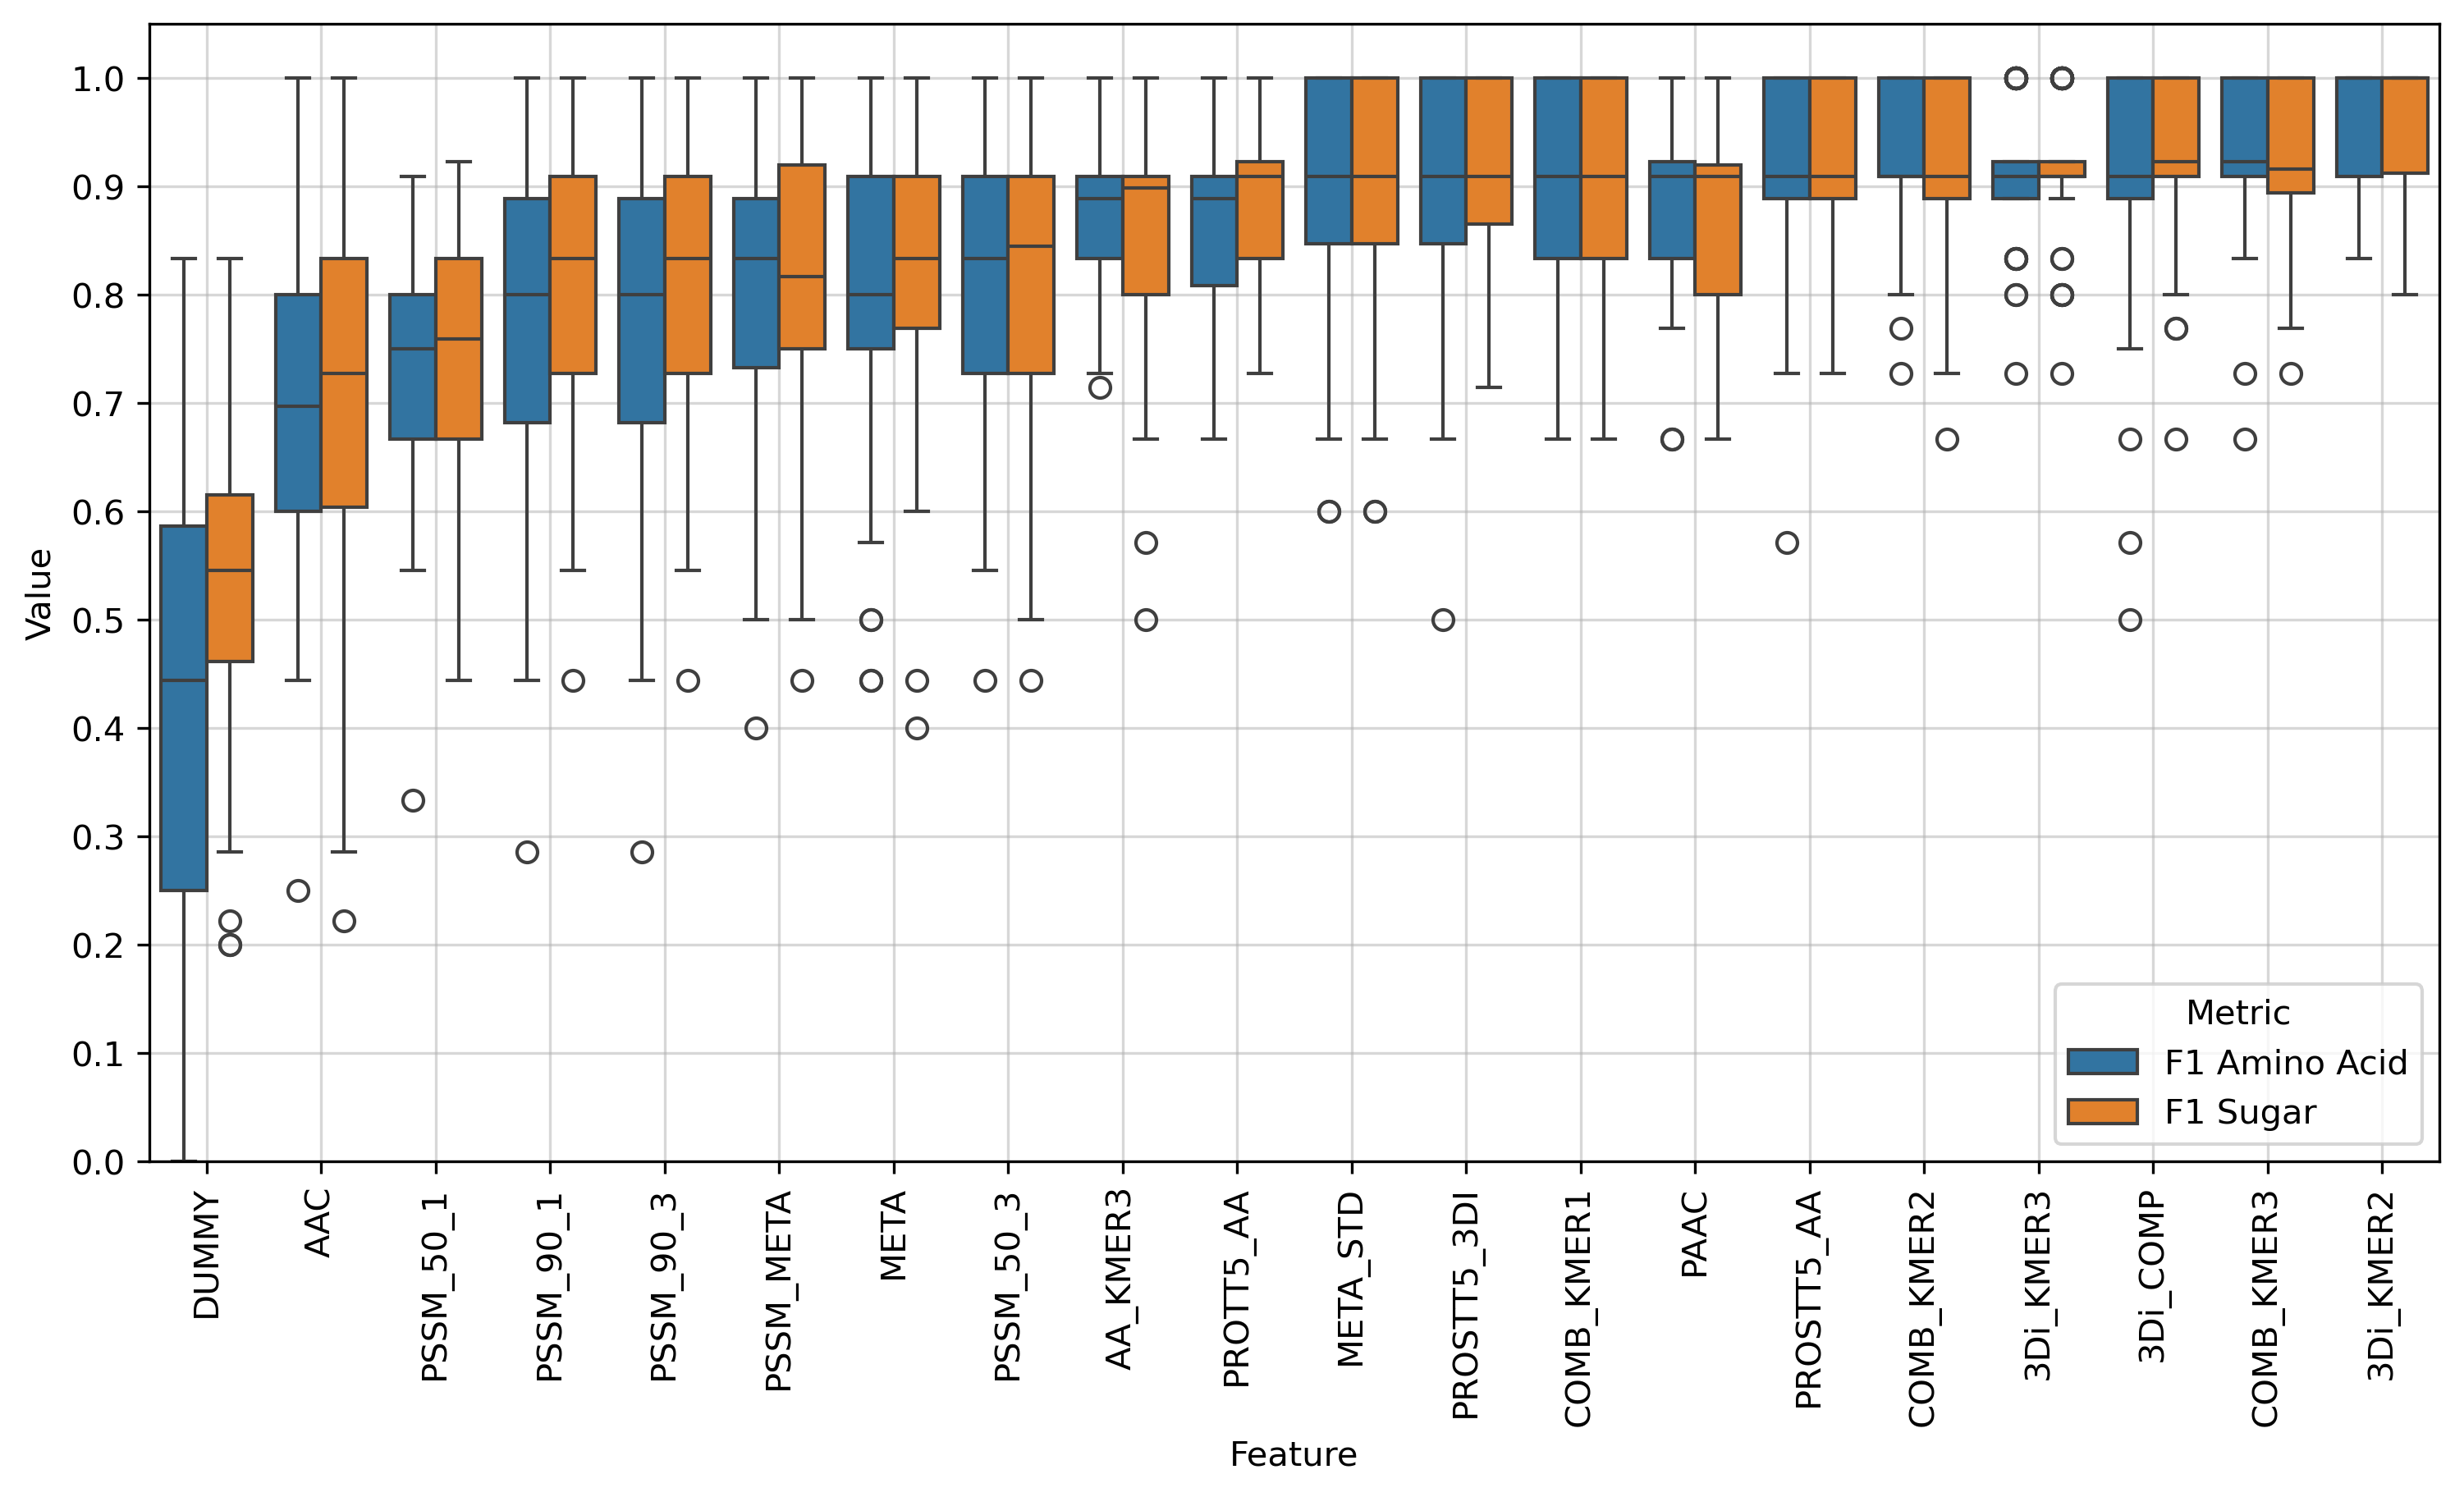

In [15]:
plot_results_long(
    df_results_long=df_results_long,
    output_folder_path=RESULTS_FOLDER,
    test_name=TEST_NAME,
    metrics_include=["F1 Amino Acid", "F1 Sugar"],
    figsize=(12, 6),
)

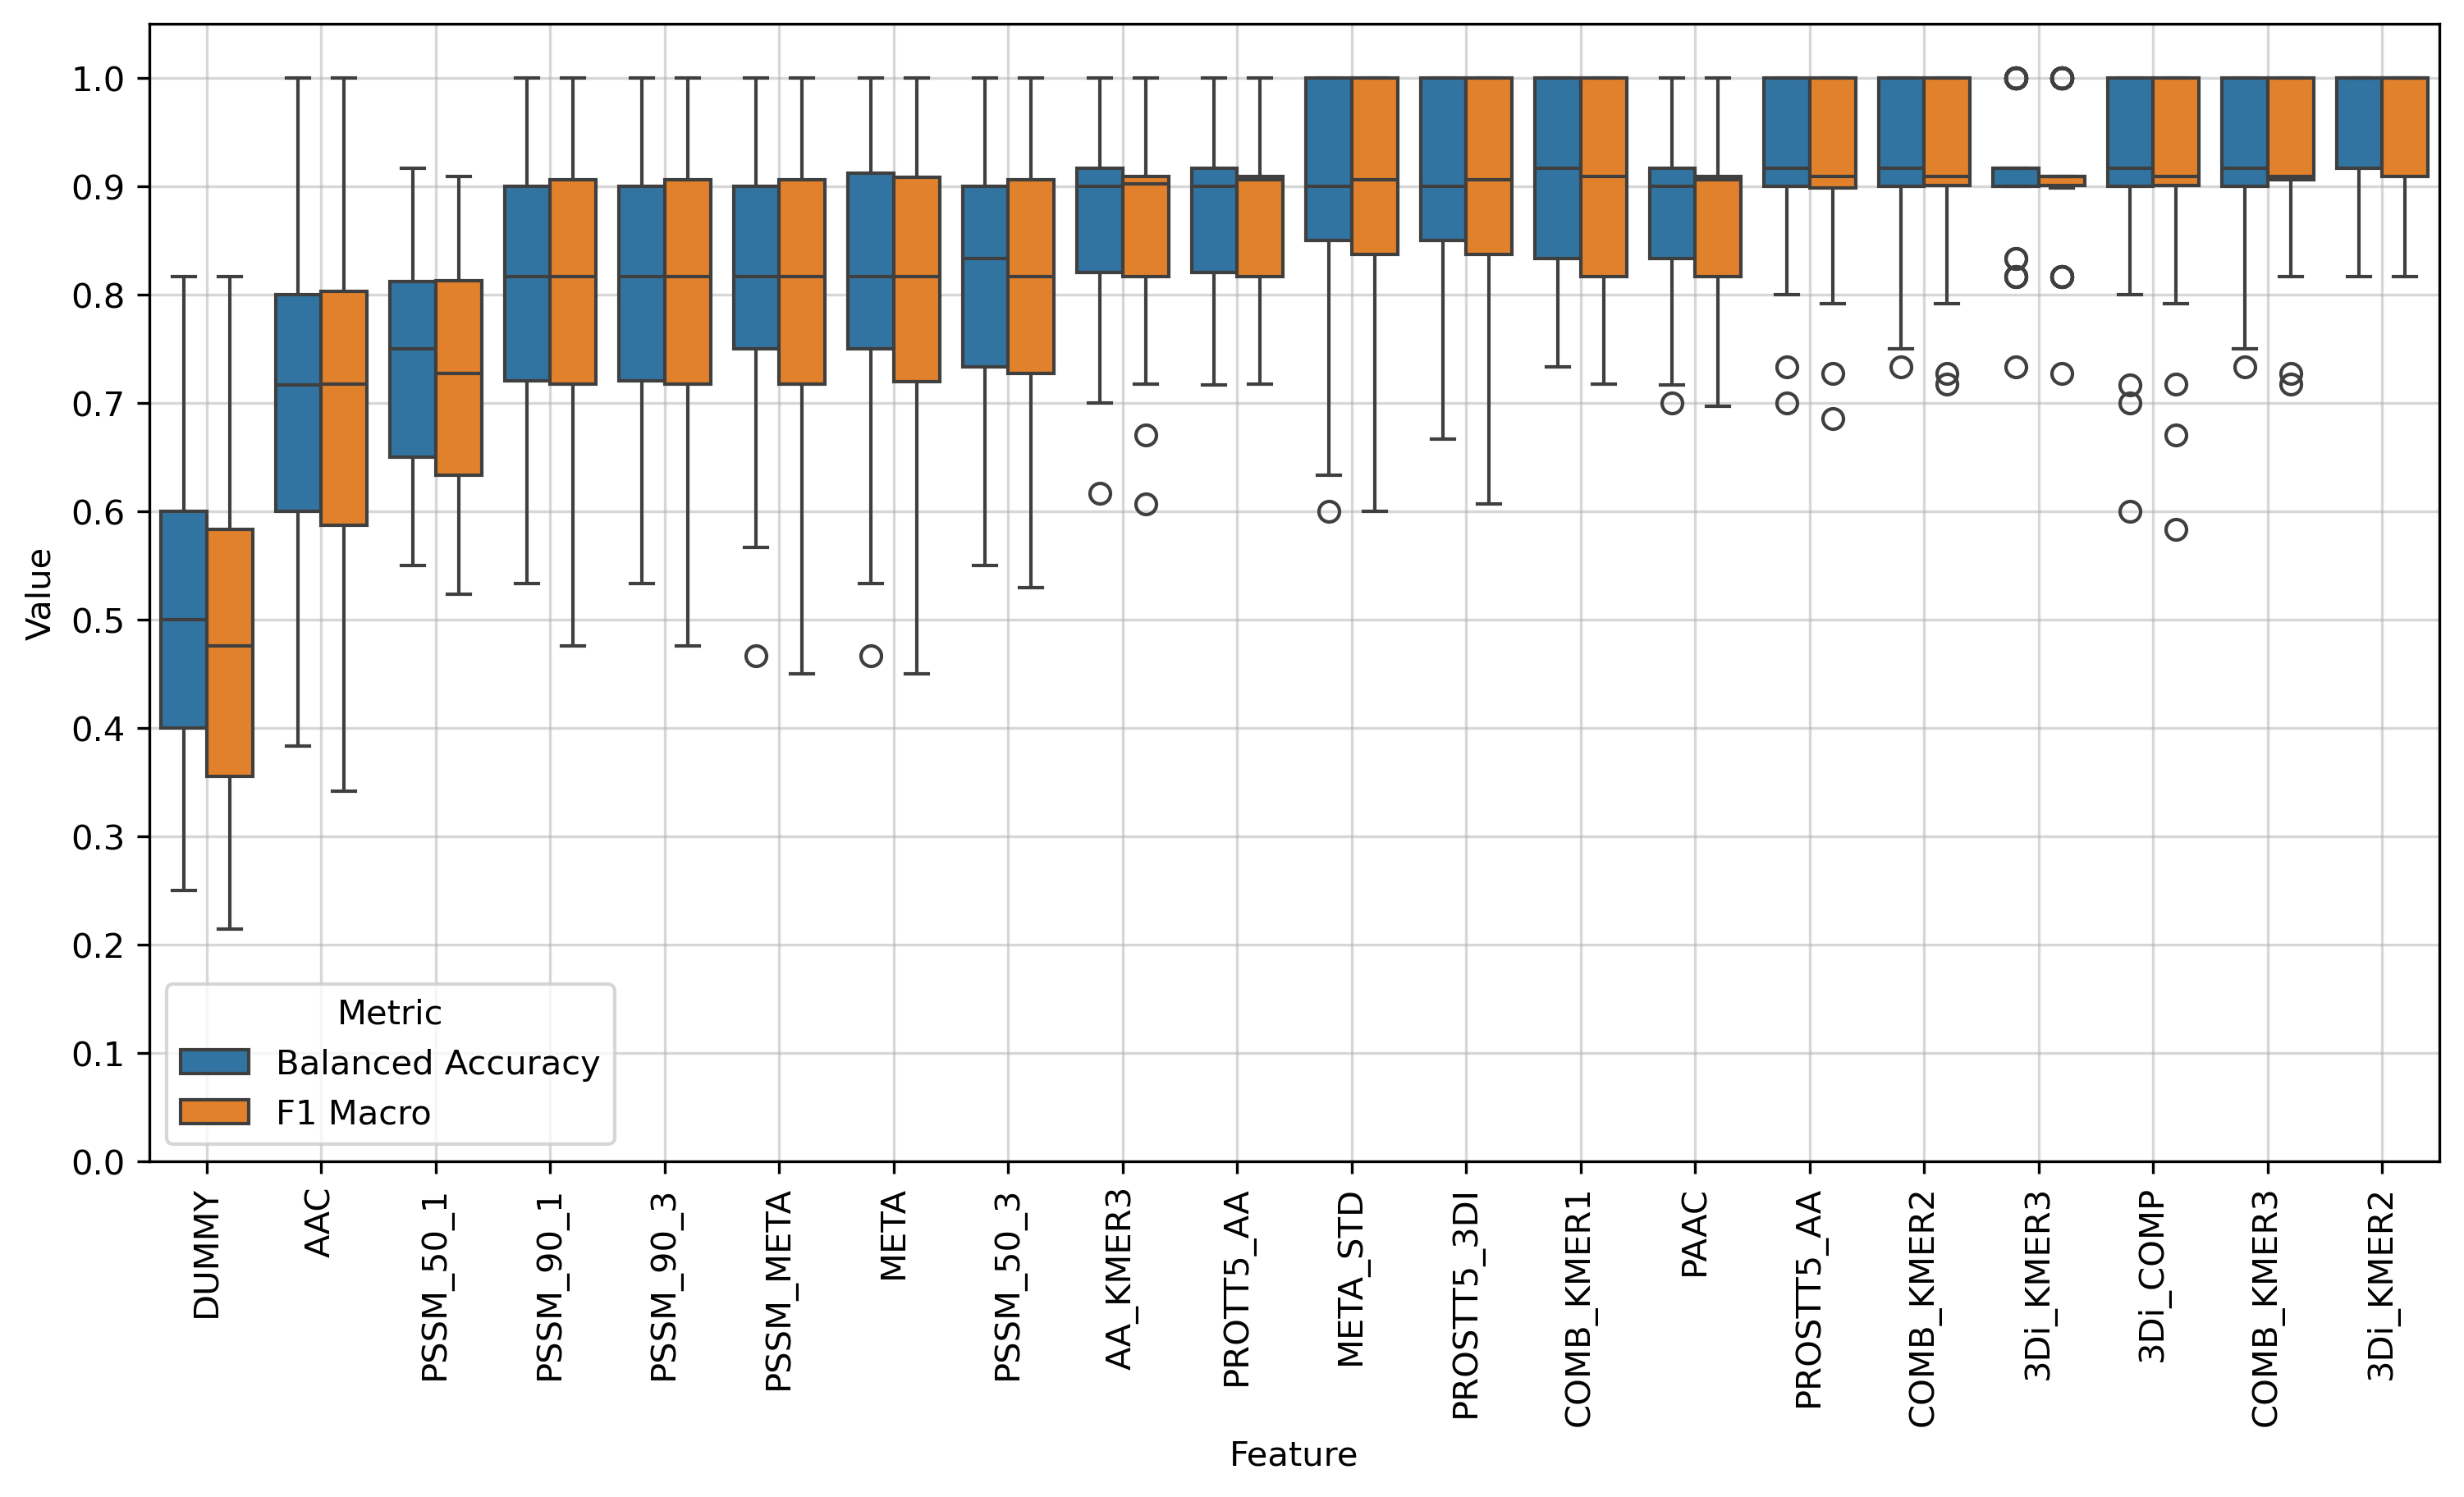

In [16]:
plot_results_long(
    df_results_long=df_results_long,
    output_folder_path=RESULTS_FOLDER,
    test_name=TEST_NAME,
    metrics_include=["F1 Macro", "Balanced Accuracy"],
)